## Assignment 1

**Submission deadlines:** 
- get at least **2** points by Tuesday, 9.03.2021
- remaining points: last lab session before or on Tuesday, 16.03.2021

**Points:** Aim to get 8 out of 12 possible points

## Submission instructions
The class is held remotely. To sumbmit your solutions please show the notebook over the video call. Make sure you know all the questions and asnwers, and that the notebook contains results (before presentation do `Runtime -> Restar and run all`)

We provide starter code, however you are not required to use it as long as you properly solve the tasks.

As always, please submit corrections using GitHub's Pull Requests to https://github.com/janchorowski/dl_uwr.

# Task description

## TLDR
Implement and train a neural network using pure numpy.


## Problem 1 [2p]
Implement a two-layer network, manually set weights and biases to solve the XOR task.

A two-layer neural network implementes a function $f: \mathbb{R}^D \rightarrow \mathbb{R}^O$ where $D$ is the input dimensionality and $O$ is the output dinemsionality. The output goes through an intermediate representation (the hidden layer) with dimensionality $H$. 

The computations are as follows:
\begin{equation}
\begin{split}
A_1 &= x W_1^T + b_1  & \qquad\text{Total input to neurons in the hidden layer (network's first layer)} \\
O_1 &= \sigma_1(A_1)  & \qquad\text{Output of the hidden layer} \\
A_2 &= O_1 W_2^T + b_2 & \qquad\text{Total input to neurons in the output layer (network's second layer)}\\
O_2 &= \sigma_2(A_2) & \qquad\text{Output of the network}
\end{split}
\end{equation}

Where $W$ are weight matrices, $b$ are bias vectors, $\sigma$ are non-linear activation functions (e.g. the logistic sigmoid applied element-wise, or softmax).

For the 2D xor problem the network will:
- have 2 inputs, 2 hidden neurons, one output
- use the logistic sigmoid everywhere (that way we, when hand-designig the weights, we can assume that neurons' outputs are binary).

Therrefore the shapes of the data floing through the network will be:
- input: $x\in\mathbb{}R^{2}$
- hidden layer parameters: $W_1\in\mathbb{}R^{2\times 2}$ and $b_1\in\mathbb{}R^{2}$
- representations in the hidden layer: $A_1\in\mathbb{}R^{2}$ and $O_1\in\mathbb{}R^{2}$
- output layer parameters: $W_2\in\mathbb{}R^{1\times 2}$ and $b_1\in\mathbb{}R^{1}$
- representations in the output layer: $A_2\in\mathbb{}R^{1}$ and $O_2\in\mathbb{}R^{1}$

The network can be seen as a logistic regression model, prefixed by a nonlinear transformation of the data.

The first tasks consists of:
- implementing the network
- selecting parametwrs ($W_1, b_1, W_2, b_2$) such that $f(x)\approx XOR(x_1, x_2)$ where the approximation is die to the sigmoids - the output may be close to 0 or 1, but doesn't need to saturate at 0 or 1.

NB: the convention on weight matrix shapes follows linear [layers in PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).


## Problem 2 [2p]
1. Add a backward pass.
2. Use a sensible random initialization for weights and biases.
3. Numerically check the correctness of your gradient computation.

There is nice article about taking derivative over vectors and vector chain rule: https://explained.ai/matrix-calculus/ if someone don't have experience with suchr calculus.


## Problem 3 [2p]
1. Implement gradient descent
2. Train your network to solve 3D XOR
3. Try several hidden layer sizes, for each size record the fracton of successful trainings. Then answer:
    - What is the minimal hidden size required to solve 3D XOR (even with low reliability, when the training has to be repeated multiple times)
    - What is the minimal hidden size required to reliably solve 3D XOR
    - Which networks are easier to train - small or large ones? Why?


## Problem 4 [1p]
Replace the first nonlinearity with the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. Find a network architecture which reliably learns the 3D XOR problem.


## Problem 5 [1p]
Add a second hidden layer to your network, implement the forward and backward pass, then demonstrate training.


## Problem 6 [2p]
Implement a way to have a _variable number_ of hidden layers. Check how deep sigmoid or ReLU networks you  can train. For simplicity you can assume that all hidden layers have the same number of neurons, and use the same activation function.


## Problem 7 [2p]
For each weight matrix $w\in\mathbb{R}^{n\times m}$, add a randomly initialized `backward weight` $w_b\in\mathbb{R}^{m\times n}$, which will not change during training. Change the backward pass to use $w_b$ instead of $w^T$, getting an approxmatoin of the true gradient. Can you get your network to train?

NB: this approach, dubbed [feedback alignment](https://www.nature.com/articles/ncomms13276), was proposed to make error backpropagation more biologically plausible, by providing a solution to the "weight transport problem". Regular backpropagation requires that neurons not only know their incoming weights (thet they control), but also their outgoing weights (that are controlled by neurons in the upper layers). This is nearly impossible in a real brain.

# Solutions and starter code

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

XOR dataset creation

(-0.05, 1.05, -0.05, 1.05)

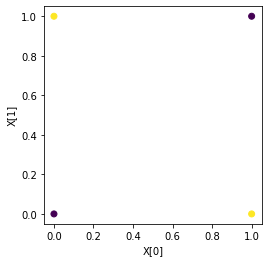

In [ ]:
# Let's define a XOR dataset

# X will be matrix of N 2-dimensional inputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1],], dtype=np.float32)
# Y is a matrix of N numners - answers
Y = np.array([[0], [1], [1], [0],], dtype=np.float32)

plt.scatter(
    X[:, 0], X[:, 1], c=Y[:, 0],
)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.axis("square")

## Problem 1

The code below contains a mock-up of a two-layer neural network. Fill in the code and manually set weights to solve the XOR problem.

Please note: the shapes are set to be compatible with PyTorch's conventions:
* a batch containing $N$ $D$-dimensional examples has shape $N\times D$ (each example is a row!)
* a weight matrix in a linear layer with $I$ inputs and $O$ outputs has shape $O \times I$
* a bias vector is a 1D vector. Please note that [broadcasting rules](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) allow us to think about it as a $1 \times D$ matrix.

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


class SmallNet:
    def __init__(self, in_features, num_hidden, dtype=np.float32):
        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden,), dtype=dtype)
        self.W2 = np.zeros((1, num_hidden), dtype=dtype)
        self.b2 = np.zeros((1,), dtype=dtype)
        self.init_params(in_features, num_hidden)

    def init_params(self, in_features, num_hidden):
        # TODO for Problem 2:
        # set all parameters to small random values, e.g. from N(0, 0.5)
        self.W1 = np.random.normal(0, 0.5, (num_hidden, in_features))
        self.b1 = np.random.normal(0, 0.5, (num_hidden,))
        self.W2 = np.random.normal(0, 0.5, (1, num_hidden))
        self.b2 = np.random.normal(0, 0.5, (1,))

    def forward(self, X, Y=None, do_backward=False):
        # TODO Problem 1: Fill in details of forward propagation

        # Input to neurons in 1st layer
        A1 = np.dot(X, self.W1.T) + self.b1
        # Outputs after the sigmoid non-linearity
        O1 = sigmoid(A1)
        # Inputs to neuron in the second layer
        A2 = np.dot(O1, self.W2.T) + self.b2
        # Outputs after the sigmoid non-linearity
        O2 = sigmoid(A2)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = -Y * np.log(O2) - (1 - Y) * np.log(1.0 - O2)
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            # TODO in Problem 2:
            # fill in the gradient computation
            # Please note, that there is a correspondance between
            # the forward and backward pass: with backward computations happening
            # in reverse order.
            # We save the gradients with respect to the parameters as fields of self.
            # It is not very elegant, but simplifies training code later on.

            # A2_grad is the gradient of loss with respect to A2
            # Hint: there is a concise formula for the gradient
            # of logistic sigmoid and cross-entropy loss
            A2_grad = O2 - Y
            self.b2_grad = A2_grad.sum(0) / X.shape[0]
            self.W2_grad = np.dot(A2_grad.T, O1) / X.shape[0]
            O1_grad = np.dot(A2_grad, self.W2)
            A1_grad = O1_grad * O1 * (1 - O1)
            self.b1_grad = A1_grad.sum(0) / X.shape[0]
            self.W1_grad = np.dot(A1_grad.T, X) / X.shape[0]

        return O2, loss

In [ ]:
# TODO Problem 1:
# Set by hand the weight values to solve the XOR problem

net = SmallNet(2, 2, dtype=np.float64)
net.W1 = np.array([10, 10, 10, 10]).reshape(2,2)
net.b1 = np.array([-5, -15])
net.W2 = np.array([10, -10]).reshape(1,2)
net.b2 = np.array([-5])

# Hint: since we use the logistic sigmoid activation, the weights may need to
# be fairly large


predictions, loss = net.forward(X, Y, do_backward=False)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0.]) = 0.0071527881888964915
XORnet([0. 1.]) = 0.9923558641717396
XORnet([1. 0.]) = 0.9923558641717396
XORnet([1. 1.]) = 0.0071527881888964785


## Problem 2

In [ ]:
def check_grad(net, param_name, X, Y, eps=1e-5):
    """A gradient checking routine"""

    param = getattr(net, param_name)
    param_flat_accessor = param.reshape(-1)

    grad = np.empty_like(param)
    grad_flat_accessor = grad.reshape(-1)

    net.forward(X, Y, do_backward=True)
    orig_grad = getattr(net, param_name + "_grad")
    assert param.shape == orig_grad.shape

    for i in range(param_flat_accessor.shape[0]):
        orig_val = param_flat_accessor[i]
        param_flat_accessor[i] = orig_val + eps
        _, loss_positive = net.forward(X, Y)
        param_flat_accessor[i] = orig_val - eps
        _, loss_negative = net.forward(X, Y)
        param_flat_accessor[i] = orig_val
        grad_flat_accessor[i] = (loss_positive - loss_negative) / (2 * eps)
    assert np.allclose(grad, orig_grad)
    return grad, orig_grad

In [ ]:
# Hint: use float64 for checking the correctness of the gradient
net = SmallNet(2, 2, dtype=np.float64)

for param_name in ["W1", "b1", "W2", "b2"]:
    check_grad(net, param_name, X, Y)

## Problem 3

In [ ]:
net = SmallNet(2, 10, dtype=np.float64)

alpha = 0.1  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X, Y, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2"]:
        param = getattr(net, param_name)
        # Hint: use the construct `param[:]` to change the contents of the array!
        # Doing instead `param = new_val` simply changes to what the variable
        # param points to, without affecting the network!
        # alternatively, you could do setattr(net, param_name, new_value)
        param[:] = param - alpha * getattr(net, param_name + "_grad")

after 0 steps 	loss=0.709872346759553
after 5000 steps 	loss=0.05510508093276124
after 10000 steps 	loss=0.010446778178377157
after 15000 steps 	loss=0.005193528714331537
after 20000 steps 	loss=0.0033785689841866594
after 25000 steps 	loss=0.002481971901701274
after 30000 steps 	loss=0.001952900769096796
after 35000 steps 	loss=0.0016056445009589772
after 40000 steps 	loss=0.0013609861959383953
after 45000 steps 	loss=0.0011796747507473474
after 50000 steps 	loss=0.0010401223575581516
after 55000 steps 	loss=0.0009295043510774081
after 60000 steps 	loss=0.0008397359996770907
after 65000 steps 	loss=0.0007654745243709257
after 70000 steps 	loss=0.000703050981998123
after 75000 steps 	loss=0.00064986429207144
after 80000 steps 	loss=0.0006040201914785013
after 85000 steps 	loss=0.0005641070930087175
after 90000 steps 	loss=0.0005290519781547688
after 95000 steps 	loss=0.0004980249073521072


In [ ]:
predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0.]) = 0.00038486199065334317
XORnet([0. 1.]) = 0.9995585884860247
XORnet([1. 0.]) = 0.9995016885129819
XORnet([1. 1.]) = 0.0005564606374097042


In [ ]:
# TODO:
# Generate data for a 3D XOR task
# Then estimate the success rate of training the network with diferent
# hidden sizes.

X3 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=np.float32)
Y3 = np.array([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=np.float32)

for hidden_dim in [2, 3, 5, 10, 20]:
    # TODO: run a few trainings and record the fraction of successful ones
    print(f"for hidden_dim {hidden_dim}\n")
    for _ in range(3):
      net = SmallNet(3, hidden_dim, dtype=np.float64)

      alpha = 0.1

      for i in range(100000):
        _, loss = net.forward(X3, Y3, do_backward=True)
        for param_name in ["W1", "b1", "W2", "b2"]:
          param = getattr(net, param_name)
          param[:] = param - alpha * getattr(net, param_name + "_grad")
      
      predictions, loss = net.forward(X3, Y3, do_backward=True)
      for x, p in zip(X3, predictions):
          print(f"3DXORnet({x}) = {p[0]}")
      print("\n")

for hidden_dim 2

3DXORnet([0. 0. 0.]) = 0.0017137955938323305
3DXORnet([0. 0. 1.]) = 0.9979199088122639
3DXORnet([0. 1. 0.]) = 0.7494738014759922
3DXORnet([0. 1. 1.]) = 0.0016419508452895726
3DXORnet([1. 0. 0.]) = 0.7494737952799806
3DXORnet([1. 0. 1.]) = 0.0016419297658318004
3DXORnet([1. 1. 0.]) = 0.7497667034052872
3DXORnet([1. 1. 1.]) = 0.7494444730959512


3DXORnet([0. 0. 0.]) = 0.0018854355013534245
3DXORnet([0. 0. 1.]) = 0.9977070119972264
3DXORnet([0. 1. 0.]) = 0.749453568188238
3DXORnet([0. 1. 1.]) = 0.0018484344637269686
3DXORnet([1. 0. 0.]) = 0.7494535901449277
3DXORnet([1. 0. 1.]) = 0.0018484967805162604
3DXORnet([1. 1. 0.]) = 0.7496016744816718
3DXORnet([1. 1. 1.]) = 0.7494356164582553


3DXORnet([0. 0. 0.]) = 0.005930412013849646
3DXORnet([0. 0. 1.]) = 0.9957183802635158
3DXORnet([0. 1. 0.]) = 0.9957184304528712
3DXORnet([0. 1. 1.]) = 0.2525405574029809
3DXORnet([1. 0. 0.]) = 0.9957187012484997
3DXORnet([1. 0. 1.]) = 0.25254041487381246
3DXORnet([1. 1. 0.]) = 0.252540388

- What is the minimal hidden size required to solve 3D XOR (even with low reliability, when the training has to be repeated multiple times)
 - The minimal hidden size required to solve 3D XOR is 2.
- What is the minimal hidden size required to reliably solve 3D XOR
 - The minimal hidden size required to reliably solve 3D XOR is 3.
- Which networks are easier to train - small or large ones? Why?
 - Large networks are easier to train because it is easier to tune in parameters when exploring more combinations.

## Problem 4


In [ ]:
def rectifier(x):
  return np.where(x >= 0, x, 0)

class SmallNet2:
    def __init__(self, in_features, num_hidden, dtype=np.float32):
        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden,), dtype=dtype)
        self.W2 = np.zeros((1, num_hidden), dtype=dtype)
        self.b2 = np.zeros((1,), dtype=dtype)
        self.init_params(in_features, num_hidden)

    def init_params(self, in_features, num_hidden):
        self.W1 = np.random.normal(0, 0.5, (num_hidden, in_features))
        self.b1 = np.random.normal(0, 0.5, (num_hidden,))
        self.W2 = np.random.normal(0, 0.5, (1, num_hidden))
        self.b2 = np.random.normal(0, 0.5, (1,))

    def forward(self, X, Y=None, do_backward=False):
        A1 = np.dot(X, self.W1.T) + self.b1
        O1 = rectifier(A1)
        A2 = np.dot(O1, self.W2.T) + self.b2
        O2 = sigmoid(A2)

        if Y is not None:
            loss = -Y * np.log(O2) - (1 - Y) * np.log(1.0 - O2)
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            A2_grad = O2 - Y
            self.b2_grad = A2_grad.sum(0) / X.shape[0]
            self.W2_grad = np.dot(A2_grad.T, O1) / X.shape[0]
            O1_grad = np.dot(A2_grad, self.W2)
            A1_grad = O1_grad * np.where(A1 >= 0, 1, 0)
            self.b1_grad = A1_grad.sum(0) / X.shape[0]
            self.W1_grad = np.dot(A1_grad.T, X) / X.shape[0]

        return O2, loss

In [ ]:
for _ in range(10):
  net = SmallNet2(3, 12, dtype=np.float64)

  alpha = 0.1

  for i in range(100000):
    _, loss = net.forward(X3, Y3, do_backward=True)
    for param_name in ["W1", "b1", "W2", "b2"]:
      param = getattr(net, param_name)
      param[:] = param - alpha * getattr(net, param_name + "_grad")
      
  predictions, loss = net.forward(X3, Y3, do_backward=True)
  for x, p in zip(X3, predictions):
      print(f"3DXORnet({x}) = {p[0]}")
  print("\n")

3DXORnet([0. 0. 0.]) = 5.1264092864848734e-05
3DXORnet([0. 0. 1.]) = 0.9999110158764697
3DXORnet([0. 1. 0.]) = 0.9998283729659596
3DXORnet([0. 1. 1.]) = 0.00015892323047886461
3DXORnet([1. 0. 0.]) = 0.9999136906078934
3DXORnet([1. 0. 1.]) = 6.267771084331711e-05
3DXORnet([1. 1. 0.]) = 0.00015659197050365108
3DXORnet([1. 1. 1.]) = 0.999853747052782


3DXORnet([0. 0. 0.]) = 6.000186578023779e-05
3DXORnet([0. 0. 1.]) = 0.9998624813607006
3DXORnet([0. 1. 0.]) = 0.9999115536760016
3DXORnet([0. 1. 1.]) = 0.0001406129011845897
3DXORnet([1. 0. 0.]) = 0.9999009509369859
3DXORnet([1. 0. 1.]) = 0.00011986076761607848
3DXORnet([1. 1. 0.]) = 7.339081991998755e-05
3DXORnet([1. 1. 1.]) = 0.9998875713249954


3DXORnet([0. 0. 0.]) = 9.036136680475657e-05
3DXORnet([0. 0. 1.]) = 0.9999081891166968
3DXORnet([0. 1. 0.]) = 0.9998134099219051
3DXORnet([0. 1. 1.]) = 0.00015676192998339062
3DXORnet([1. 0. 0.]) = 0.9998767410138593
3DXORnet([1. 0. 1.]) = 4.316527900087109e-05
3DXORnet([1. 1. 0.]) = 0.0001882664

## Problem 5

In [ ]:
class SmallNet3:
    def __init__(self, in_features, num_hidden, dtype=np.float32):
        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden,), dtype=dtype)
        self.W2 = np.zeros((num_hidden, num_hidden), dtype=dtype)
        self.b2 = np.zeros((num_hidden,), dtype=dtype)
        self.W3 = np.zeros((1, num_hidden), dtype=dtype)
        self.b3 = np.zeros((1,), dtype=dtype)
        self.init_params(in_features, num_hidden)

    def init_params(self, in_features, num_hidden):
        self.W1 = np.random.normal(0, 0.5, (num_hidden, in_features))
        self.b1 = np.random.normal(0, 0.5, (num_hidden,))
        self.W2 = np.random.normal(0, 0.5, (num_hidden, num_hidden))
        self.b2 = np.random.normal(0, 0.5, (num_hidden,))
        self.W3 = np.random.normal(0, 0.5, (1, num_hidden))
        self.b3 = np.random.normal(0, 0.5, (1,))

    def forward(self, X, Y=None, do_backward=False):
        A1 = np.dot(X, self.W1.T) + self.b1
        O1 = sigmoid(A1)
        A2 = np.dot(O1, self.W2.T) + self.b2
        O2 = sigmoid(A2)
        A3 = np.dot(O2, self.W3.T) + self.b3
        O3 = sigmoid(A3)

        if Y is not None:
            loss = -Y * np.log(O3) - (1 - Y) * np.log(1.0 - O3)
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            A3_grad = O3 - Y
            self.b3_grad = A3_grad.sum(0) / X.shape[0]
            self.W3_grad = np.dot(A3_grad.T, O2) / X.shape[0]
            O2_grad = np.dot(A3_grad, self.W3)

            A2_grad = O2_grad * O2 * (1 - O2)
            self.b2_grad = A2_grad.sum(0) / X.shape[0]
            self.W2_grad = np.dot(A2_grad.T, O1) / X.shape[0]
            O1_grad = np.dot(A2_grad, self.W2)

            A1_grad = O1_grad * O1 * (1 - O1)
            self.b1_grad = A1_grad.sum(0) / X.shape[0]
            self.W1_grad = np.dot(A1_grad.T, X) / X.shape[0]

        return O3, loss

In [ ]:
net = SmallNet3(3, 2, dtype=np.float64)

for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
    check_grad(net, param_name, X3, Y3)

In [ ]:
for hidden_dim in [3, 5, 10, 20]:
    print(f"for hidden_dim {hidden_dim}\n")
    for _ in range(3):
      net = SmallNet3(3, hidden_dim, dtype=np.float64)

      alpha = 0.2

      for i in range(100000):
        _, loss = net.forward(X3, Y3, do_backward=True)
        for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
          param = getattr(net, param_name)
          param[:] = param - alpha * getattr(net, param_name + "_grad")
      
      predictions, loss = net.forward(X3, Y3, do_backward=True)
      for x, p in zip(X3, predictions):
          print(f"3DXORnet({x}) = {p[0]}")
      print("\n")

for hidden_dim 3

3DXORnet([0. 0. 0.]) = 0.500162313241567
3DXORnet([0. 0. 1.]) = 0.5000563227074306
3DXORnet([0. 1. 0.]) = 0.5000448393485588
3DXORnet([0. 1. 1.]) = 0.49998694425552304
3DXORnet([1. 0. 0.]) = 0.5000526518786723
3DXORnet([1. 0. 1.]) = 0.49993545210800655
3DXORnet([1. 1. 0.]) = 0.4999213686348385
3DXORnet([1. 1. 1.]) = 0.49985438902326407


3DXORnet([0. 0. 0.]) = 8.015859502624048e-05
3DXORnet([0. 0. 1.]) = 0.9998652693132394
3DXORnet([0. 1. 0.]) = 0.9998532053643436
3DXORnet([0. 1. 1.]) = 0.0001914685113239664
3DXORnet([1. 0. 0.]) = 0.9997888948903432
3DXORnet([1. 0. 1.]) = 0.00013903354411790725
3DXORnet([1. 1. 0.]) = 0.00012471034610348302
3DXORnet([1. 1. 1.]) = 0.9999453927658702


3DXORnet([0. 0. 0.]) = 0.00012529385456454563
3DXORnet([0. 0. 1.]) = 0.9999601957834398
3DXORnet([0. 1. 0.]) = 0.9999099486723116
3DXORnet([0. 1. 1.]) = 0.00013990950020170627
3DXORnet([1. 0. 0.]) = 0.9998433110864342
3DXORnet([1. 0. 1.]) = 7.700690448940945e-05
3DXORnet([1. 1. 0.]) = 6.28

## Problem 6

## Problem 7